In [1]:
# Step 1

%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom as pdicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
import glob
import cv2
import mahotas as mh
import tensorflow as tf
import matplotlib.image as mpimg


#from skimage import measure, morphology
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
# Step 2

hr={}

labels_df= pd.read_csv('calc_case_description_test_set.csv',index_col=False)
labels_df.index+=1
labels_df['image file path']='DOI/'+labels_df['image file path']
labels_df['cropped image file path']='DOI/'+labels_df['cropped image file path'].str[:-1]
labels_df['ROI mask file path']='DOI/'+labels_df['ROI mask file path']
#print('computing..')    
#def ff(x):
#    img=pdicom.read_file(x)
#    imgpx=((img.pixel_array/65535)*255).astype(np.uint8) #compute haralick features 
#    #img4=cv2.resize(imgpx,(100,100)).astype(np.uint8)
#    kernel = np.ones((5,5),np.float32)/25
#    dilation = cv2.dilate(imgpx,kernel,iterations = 1)
#    dst = cv2.filter2D(dilation,-1,kernel)
#    return(mh.features.haralick(dst).mean(0))

#labels_df['haralick for region of interest '] = labels_df['ROI mask file path'].map(ff)
#print('STAGE 1 DONE')
#labels_df['haralick for actual breast images '] = labels_df['image file path'].map(ff)
#print('STAGE 2 DONE')

In [ ]:
# We dont need this now
img = []
imgpx = []
img4 = []
for i in range(1,20):
    
    img=pdicom.read_file(labels_df['image file path'][i])
    imgpx=((img.pixel_array/65535)*255).astype(np.uint8)  
    #img4=cv2.resize(imgpx,(100,100)).astype(np.uint8)
    kernel = np.ones((5,5),np.float32)/25
   
    
    
    #dilation = cv2.dilate(imgpx,kernel,iterations = 1)
    #dst = cv2.filter2D(dilation,-1,kernel)
    #median = cv2.medianBlur(dst,5)
    #blur = cv2.GaussianBlur(median,(5,5),0)
  
    n=res.sample()
    n_labels=test['pathology'].tolist()
    plt.subplot(121),plt.imshow(imgpx),plt.title('Original')
    print (n_labels[i])
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(dst),plt.title('Processed')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
sav=labels_df  #make a copy of the "fixed" dataframe 
res=labels_df[['left or right breast','image view','pathology','ROI mask file path',]][labels_df['pathology']!='BENIGN_WITHOUT_CALLBACK']
res  #res has only features we need 

In [ ]:
#training and testing split 
train=res.sample(frac=0.8,random_state=100)
test=res.drop(train.index)
test_labels=test['pathology'].tolist()
train_labels=train['pathology'].tolist()
#test_features=test['haralick for region of interest '].tolist()
#train_features=train['haralick for region of interest '].tolist()
print(len(test))
print(len(train))

In [ ]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

(-0.5, 3015.5, 4615.5, -0.5)

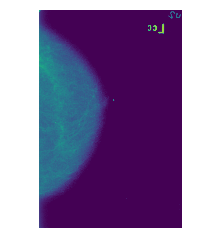

In [3]:
# Step 3
img = pdicom.read_file(labels_df['image file path'][1])
image=((img.pixel_array/65535)*255).astype(np.uint8)  
plt.imshow(image)
plt.axis('off')

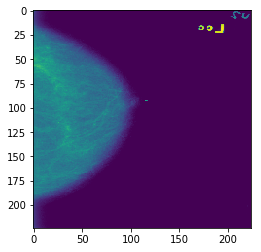

In [4]:
# Step 4
img4=cv2.resize(image,(224,224)).astype(np.uint8)
plt.imshow(img4)

In [ ]:
img4.shape

In [ ]:
#image = mpimg.imread('stopsign.jpg')
#plt.imshow(image);
#plt.axis('off');

In [ ]:
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,20,10,5,brightness=1)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [10]:
# Step 5

from skimage.transform import rotate
from skimage.transform import resize


def rotate_img(img,h,w,name):
    from skimage.io import imsave
    temp=np.zeros((0,h*w),dtype=np.uint8)
    img = resize(img, (h,w),mode='reflect')
    rads = [0,90,180 ] #increase as needed.
    n=0
    for i in rads:
        img_r = rotate(img,i)

        try:
            plt.imshow(img_r)
            plt.show()
            #imsave( filename , img_r)
        except:
            print("low contrast")
        n+=1
    

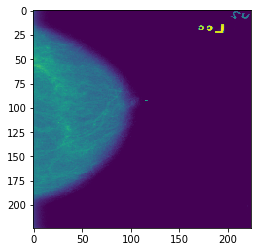

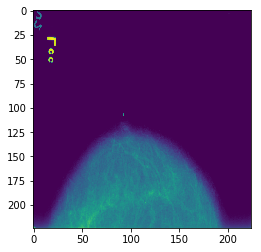

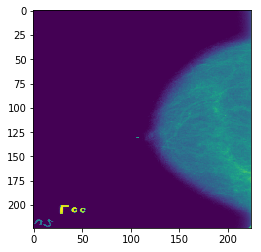

In [11]:
# Step 6

h=224
w=224
rotate_img(img4,h,w,'test')

In [7]:
# Step 7

import numpy as np
import os
import cv2
def noisy(noise_typ,image):
    
    if noise_typ == "gauss":
        row,col= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col))
        gauss = gauss.reshape(row,col,)
        noisy = image + gauss
        return noisy
   
    elif noise_typ == "s&p":
        row,col= image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                  for i in image.shape]
        out[coords] = 1

        
       # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
  
    elif noise_typ =="speckle":
        row,col = image.shape
        gauss = np.random.randn(row,col)
        gauss = gauss.reshape(row,col)        
        noisy = image + image * gauss
        return noisy

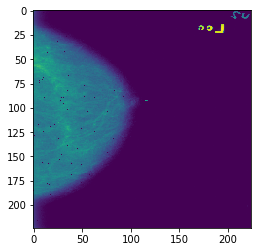

In [8]:
# Step 8

noise_image = noisy("s&p",img4)
plt.imshow(noise_image)
plt.show()

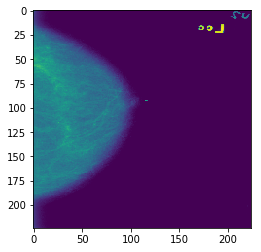

In [9]:
# Step 9

plt.imshow(img4)
plt.show()